In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import datetime
import calendar

In [2]:
abb_file = "Resources//ABB_clean.csv"
weather_file = "Resources//weather_data.csv"
#c_file = "Resources//chase_clean.csv"

In [3]:
abb_df = pd.read_csv(abb_file)
wea_df = pd.read_csv(weather_file)
#c_file = pd.read_csv(chase_file)

In [4]:
abb_df.head()

,Start Date,Type,Nights,Currency,Amount,Host Fee,Cleaning Fee
0,8/4/2017,Reservation,2,USD,425.54,13.16,130
1,8/6/2017,Reservation,2,USD,346.10,10.70,130
2,8/11/2017,Reservation,2,USD,468.51,14.49,150
3,8/18/2017,Reservation,2,USD,555.00,17.00,130
4,8/25/2017,Reservation,2,USD,472.39,14.61,150


In [5]:
new_df = [abb_df['Start Date']]

In [6]:
abb_df['Month'] = pd.DatetimeIndex(abb_df['Start Date']).month

In [7]:
abb_df.head()

,Start Date,Type,Nights,Currency,Amount,Host Fee,Cleaning Fee,Month
0,8/4/2017,Reservation,2,USD,425.54,13.16,130,8
1,8/6/2017,Reservation,2,USD,346.10,10.70,130,8
2,8/11/2017,Reservation,2,USD,468.51,14.49,150,8
3,8/18/2017,Reservation,2,USD,555.00,17.00,130,8
4,8/25/2017,Reservation,2,USD,472.39,14.61,150,8


In [8]:
abb_group = abb_df.groupby(['Month'])

In [9]:
abb_group_df = pd.DataFrame(abb_group.Amount.sum())
abb_group_df['Total_Nights'] = pd.DataFrame(abb_group.Nights.sum())

In [10]:
abb_group_df.reset_index()

,Month,Amount,Total_Nights
0,1,4421.50,24
1,2,9731.52,36
2,3,2253.07,10
3,4,11560.25,19
4,5,3419.49,21
5,6,2973.71,16
6,7,3360.00,19
7,8,2267.54,10
8,9,1651.80,6
9,10,1639.20,10


In [11]:
abb_group_df['Reservations'] = pd.DataFrame(abb_group.Amount.count())

In [12]:
abb_group_df['Revenue Per Reservation'] = abb_group_df.Amount/abb_group_df.Reservations

In [13]:
abb_group_df.reset_index()
abb_group_df['Month']=abb_group_df.index

In [14]:
abb_group_avg_stay_df = pd.DataFrame(abb_group.Nights.mean())

In [15]:
abb_group_avg_stay_df.reset_index()
abb_group_avg_stay_df['Month']=abb_group_avg_stay_df.index

In [16]:
wea_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,TMAX,TMIN
0,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/1/2017,8.05,107,88
1,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/2/2017,4.47,102,90
2,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/3/2017,3.80,100,75
3,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/4/2017,5.59,109,82
4,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/5/2017,7.61,109,83


In [17]:
wea_df['Month'] = pd.DatetimeIndex(wea_df['DATE']).month

In [18]:
wea_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,TMAX,TMIN,Month
0,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/1/2017,8.05,107,88,8
1,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/2/2017,4.47,102,90,8
2,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/3/2017,3.80,100,75,8
3,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/4/2017,5.59,109,82,8
4,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/5/2017,7.61,109,83,8
5,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/6/2017,8.28,107,82,8
6,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/7/2017,6.49,111,83,8
7,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/8/2017,6.49,111,80,8
8,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/9/2017,8.28,111,82,8
9,USW00093138,"PALM SPRINGS ASOS, CA US",33.8222,-116.5043,124.7,8/10/2017,4.47,111,77,8


In [19]:
wea_group = wea_df.groupby(['Month'])

In [20]:

wea_group_df = pd.DataFrame(wea_group.TMAX.mean())
wea_group_df['Avg_Min_Temp'] = pd.DataFrame(wea_group.TMIN.mean())
wea_group_df['Avg_Wind_Speed'] = pd.DataFrame(wea_group.AWND.mean())

In [21]:
wea_group_df = wea_group_df.reset_index()


In [22]:
wea_group_df

,Month,TMAX,Avg_Min_Temp,Avg_Wind_Speed
0,1,76.419355,51.741935,4.148710
1,2,75.178571,49.785714,5.312143
2,3,79.709677,54.870968,6.168710
3,4,91.600000,62.266667,7.702333
4,5,93.806452,66.064516,9.870323
5,6,106.200000,73.800000,7.554000
6,7,109.838710,85.000000,6.638065
7,8,109.031250,81.687500,6.788750
8,9,98.200000,73.300000,7.315000
9,10,94.451613,66.935484,5.687097


In [23]:
merge_df=pd.merge(wea_group_df,abb_group_avg_stay_df, on='Month')
merge_df

,Month,TMAX,Avg_Min_Temp,Avg_Wind_Speed,Nights
0,1,76.419355,51.741935,4.148710,6.000000
1,2,75.178571,49.785714,5.312143,12.000000
2,3,79.709677,54.870968,6.168710,10.000000
3,4,91.600000,62.266667,7.702333,4.750000
4,5,93.806452,66.064516,9.870323,4.200000
5,6,106.200000,73.800000,7.554000,2.285714
6,7,109.838710,85.000000,6.638065,2.714286
7,8,109.031250,81.687500,6.788750,2.000000
8,9,98.200000,73.300000,7.315000,2.000000
9,10,94.451613,66.935484,5.687097,2.500000


In [24]:
wea_group_df.columns

Index(['Month', 'TMAX', 'Avg_Min_Temp', 'Avg_Wind_Speed'], dtype='object')

In [25]:
abb_group_avg_stay_df.columns

Index(['Nights', 'Month'], dtype='object')

In [26]:
final_merge_df = pd.merge(abb_group_df,merge_df, on ='Month')
final_merge_df

,Amount,Total_Nights,Reservations,Revenue Per Reservation,Month,TMAX,Avg_Min_Temp,Avg_Wind_Speed,Nights
0,4421.50,24,4,1105.375000,1,76.419355,51.741935,4.148710,6.000000
1,9731.52,36,3,3243.840000,2,75.178571,49.785714,5.312143,12.000000
2,2253.07,10,1,2253.070000,3,79.709677,54.870968,6.168710,10.000000
3,11560.25,19,4,2890.062500,4,91.600000,62.266667,7.702333,4.750000
4,3419.49,21,5,683.898000,5,93.806452,66.064516,9.870323,4.200000
5,2973.71,16,7,424.815714,6,106.200000,73.800000,7.554000,2.285714
6,3360.00,19,7,480.000000,7,109.838710,85.000000,6.638065,2.714286
7,2267.54,10,5,453.508000,8,109.031250,81.687500,6.788750,2.000000
8,1651.80,6,3,550.600000,9,98.200000,73.300000,7.315000,2.000000
9,1639.20,10,4,409.800000,10,94.451613,66.935484,5.687097,2.500000


In [27]:
final_merge_df.columns

Index(['Amount', 'Total_Nights', 'Reservations', 'Revenue Per Reservation',
       'Month', 'TMAX', 'Avg_Min_Temp', 'Avg_Wind_Speed', 'Nights'],
      dtype='object')

In [28]:
final_merge_df.columns = ['Total Revenue', 'Total Nights', 'Total Reservations', 'Revenue Per Reservation',
       'Month', 'Avg Max Temp', 'Avg Min Temp', 'Avg Wind Speed', 'Average Length of Stay']

In [29]:
month_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month = ['Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17']
month_df = pd.DataFrame(columns=['Month','Month_Label'])
month_df['Month']=month_list
month_df['Month_Label']=month
month_df

,Month,Month_Label
0,1,Jan-18
1,2,Feb-18
2,3,Mar-18
3,4,Apr-18
4,5,May-18
5,6,Jun-18
6,7,Jul-18
7,8,Aug-17
8,9,Sep-17
9,10,Oct-17


In [30]:
final_merge_df = pd.merge(final_merge_df,month_df, on ='Month')

In [31]:
final_merge_df

,Total Revenue,Total Nights,Total Reservations,Revenue Per Reservation,Month,Avg Max Temp,Avg Min Temp,Avg Wind Speed,Average Length of Stay,Month_Label
0,4421.50,24,4,1105.375000,1,76.419355,51.741935,4.148710,6.000000,Jan-18
1,9731.52,36,3,3243.840000,2,75.178571,49.785714,5.312143,12.000000,Feb-18
2,2253.07,10,1,2253.070000,3,79.709677,54.870968,6.168710,10.000000,Mar-18
3,11560.25,19,4,2890.062500,4,91.600000,62.266667,7.702333,4.750000,Apr-18
4,3419.49,21,5,683.898000,5,93.806452,66.064516,9.870323,4.200000,May-18
5,2973.71,16,7,424.815714,6,106.200000,73.800000,7.554000,2.285714,Jun-18
6,3360.00,19,7,480.000000,7,109.838710,85.000000,6.638065,2.714286,Jul-18
7,2267.54,10,5,453.508000,8,109.031250,81.687500,6.788750,2.000000,Aug-17
8,1651.80,6,3,550.600000,9,98.200000,73.300000,7.315000,2.000000,Sep-17
9,1639.20,10,4,409.800000,10,94.451613,66.935484,5.687097,2.500000,Oct-17


In [32]:
# plt.scatter(final_merge_df['Total Revenue'],final_merge_df['Avg Max Temp'], c="cyan",edgecolors="black", alpha=.5,s = 400)

# plt.title('By Month Revenue vs Temperature')
# plt.xlabel('Revenue')
# plt.ylabel('Temperature (F)')
# # plt.text(1,1,'text',fontsize=12)
# plt.style.use('seaborn-deep')





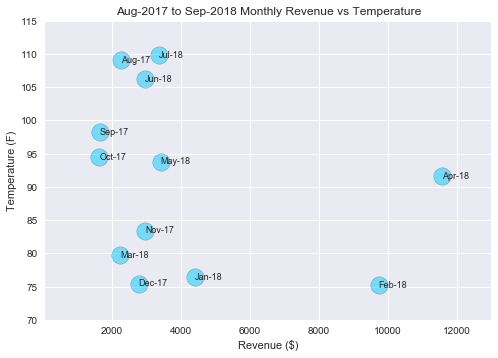

In [72]:
ax = final_merge_df.plot.scatter(x = 'Total Revenue', y='Avg Max Temp', alpha =.5, s=300, c = '#00CCFF',edgecolors="black")
for i, txt in enumerate(final_merge_df.Month_Label):
    ax.annotate(txt, (final_merge_df['Total Revenue'].iat[i], final_merge_df['Avg Max Temp'].iat[i]-.3),fontsize=9)

ax.axis([70, 13000, 70, 115]) 
plt.style.use('seaborn-muted')
plt.title('Aug-2017 to Sep-2018 Monthly Revenue vs Temperature')
plt.xlabel('Revenue ($)')
plt.ylabel('Temperature (F)')
plt.savefig('Aug-2017_to_Sep-2018_Monthly_Revenue_vs_Temperature',dpi=900)

In [34]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

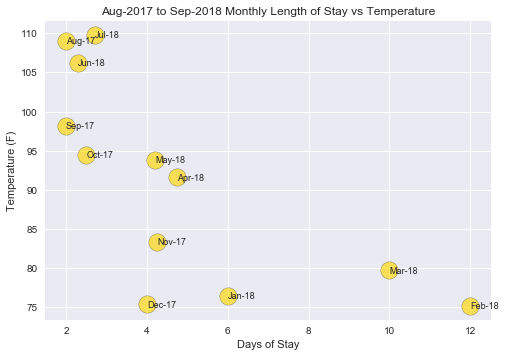

In [61]:
ax = final_merge_df.plot.scatter(x = 'Average Length of Stay', y='Avg Max Temp', alpha =.65, s=300, c = 'gold',edgecolors="black")
for i, txt in enumerate(final_merge_df.Month_Label):
    ax.annotate(txt, (final_merge_df['Average Length of Stay'].iat[i], final_merge_df['Avg Max Temp'].iat[i]-.35),fontsize=9)

# ax.axis([70, 13000, 70, 115]) 
plt.style.use('seaborn-muted')
plt.title('Aug-2017 to Sep-2018 Monthly Length of Stay vs Temperature')
plt.xlabel('Days of Stay')
plt.ylabel('Temperature (F)')
plt.savefig('Aug-2017_to_Sep-2018_Monthly_Length_Of_Stay_vs_Temperature',dpi=900)

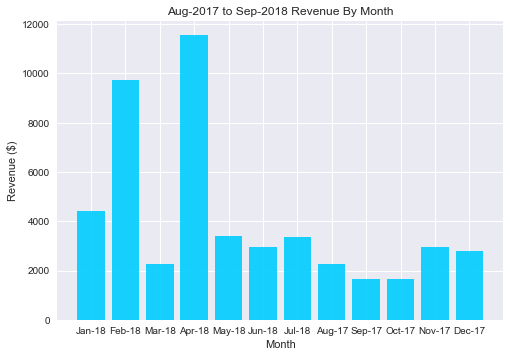

In [77]:
x_axis = np.arange(len(final_merge_df.Month_Label))
plt.bar(x_axis, final_merge_df['Total Revenue'], color="#00CCFF", align="center",alpha=.9)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, final_merge_df['Month_Label'])
plt.style.use('seaborn-muted')
plt.title('Aug-2017 to Sep-2018 Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.savefig('Aug-2017_to_Sep-2018_Monthly_Revenue',dpi=900)

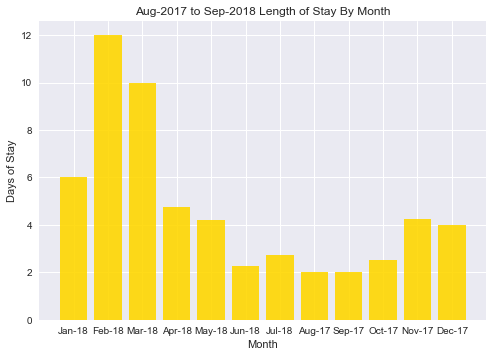

In [74]:
x_axis = np.arange(len(final_merge_df.Month_Label))
plt.bar(x_axis, final_merge_df['Average Length of Stay'], color="gold",alpha=.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, final_merge_df['Month_Label'])
plt.style.use('seaborn-muted')
plt.title('Aug-2017 to Sep-2018 Length of Stay By Month')
plt.xlabel('Month')
plt.ylabel('Days of Stay')
plt.savefig('Aug-2017_to_Sep-2018_Monthly_Length_of_Stay',dpi=900)